
<img src="./logo_UTN.svg" align="right" width="150" /> 
 Teoría de Circuitos II

# Trabajo semanal 8
#### Israel Pavelek



### Sistemas muestreados - Pre énfasis

En moduladores de FM se requiere, por cuestiones de relación señal a ruido, aumentar la potencia de la señal a transmitir previo a ser moduladada.

Para ello, típicamente se utiliza un circuito bilineal analǵico. Considere que la posición del cero está 2KHz, el polo está en 20KHz y la ganancia es tal que en continua, el filtro tiene 0dB de ganancia.

Se desea realizar un filtro digital que cumpla la misma función mediante el método de transformación bilineal. Se pide:

* Construya el filtro analógico que se describe y proponga una estructura activa que permita lograrlo.
* Aplicando la transformación bilineal, obtenga la transferencia H(z) en función de los coeficientes del filtro y la frecuencia de sampleo.
* Estudio de las frecuencias de sampleo con warping.
* * Compute la frecuencia de sampleo que genera un error del 5% en la frecuencia del cero analógico ¿Qué error observa en la frecuencia analógica del polo?
* * Compute la frecuencia de sampleo que genera un error del 5% en la frecuencia del polo analógico. ¿Qué error observa en la frecuencia analógica del cero?
* * ¿Cuál es frecuencia de sampleo mínima teórica que puede utilizar?
* * Suponga que utiliza una frecuencia de sampleo de 80KHz, ¿cómo quedaría la transferencia analógica el filtro de pre énfasis tras aplicar el pre énfasis ¿y la digital?
* (Utilice 80KHz como frencuencia de sampleo para los siguientes incisos)  Proponga una estructura para la implementación del filtro digital previamente computado.
* Entendiendo que la señal analógica no esta acotada en banda y tiene un espectro como el que se ve en la imagen debajo, sabiendo que hay información hasta 20KHz:
* * Compute el número de niveles de cuantización mínimo en función del espectro provisto. ¿Cuántos bits de cuantización se requieren?
* * Describa el proceso de selección del filtro antialias. ¿Cuáles son las consideraciones de plantilla?

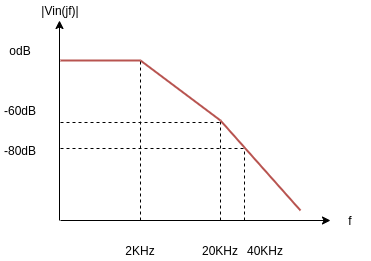

Para construir el filtro partiendo que estamos ante un filtro bilineal de la forma:

$$ F(s)=K  \cdot  \frac{s+Z}{s+P}$$

Dado que nos piden que el zero esté en 2KHz y el polo en 20KHz a modo de trabajar con un filtro normalizado tomo $2\pi2KHz$. 

$Z=1$

$P=10$

$$ F(s)=K  \cdot  \frac{s+1}{s+10}$$

Como debe tener una ganancia unitaria en continua para s->0 F(s)=1 por lo tanto K=10

$$ F(s)=10 \cdot \frac{s+1}{s+10}$$

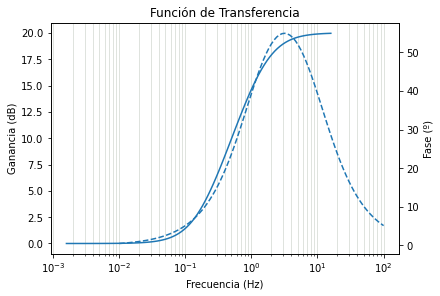

In [126]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(constrained_layout=True)
system = signal.TransferFunction([10,10], [1, 10])

w, mag, phase = system.bode()
ax.set_title('Función de Transferencia')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Ganancia (dB)')
ax.semilogx(w/(2*math.pi), mag)
ax.grid(True, which='both', axis='x', color='xkcd:light grey')
phase_ax = ax.twinx()
phase_ax.set_ylabel('Fase (º)')
phase_ax.semilogx(w, phase, linestyle='dashed')

Propongo la siguiente red activa:

<img src="./circuito.png" align="center" width="400" /> 

Cuya transferencia es:

$T(s)=-\frac{sC_1+\frac{1}{R_1}}{2C_2+\frac{1}{R_2}}$

$T(s)=-\frac{C_1}{C_2}\frac{s+\frac{1}{C_1R_1}}{s+\frac{1}{C_2R_2}}$

Dados los valores:

$C_1=10$
$C_2=1$
$R_1=1$
$R_2=1$

$$ F(s)=10 \cdot \frac{s+1}{s+10}$$


<img src="./circuito2.png" align="center" width="400" /> 



Desnormalizando para $\omega=2\pi2KHz$ y una norma de impedancia de $1K\Omega$

$C_1=790nf$
$C_2=79nf$
$R_1=1K\Omega$
$R_2=1K\Omega$

<img src="./simu.png" align="center" width="400"/> 




### Punto 2

Aplicando la transformación bilineal

$s=2fs \cdot \frac{1-Z^{-1}}{1+Z^{-1}}$

$$ F(Z)=10 \cdot \frac{2fs \cdot \frac{1-Z^{-1}}{1+Z^{-1}}+1}{2fs \cdot \frac{1-Z^{-1}}{1+Z^{-1}}+10}$$

$$ F(Z)=10 \cdot \frac{2fs-2fsZ^{-1}+1+Z^{-1}}{2fs-2fsZ^{-1}+10+10Z^{-1}}$$

$$ F(Z)=10 \cdot \frac{Z^{-1}(1-2fs)+1+2fs}{Z^{-1}(10-2fs)+10+2fs}$$

$$ F(Z)=10 \cdot \frac{(1-2fs)+(1+2fs)Z}{10-2fs+(10+2fs)Z}$$

$$ F(Z)=10 \cdot \frac{(1+2fs)Z+(1-2fs)}{(10+2fs)Z+10-2fs}$$

### Punto 3

El mapeo de frecuencias analogicas a digitales se realiza con el warping donde 

$\omega_a=\frac{2}{T}tan(\omega \frac{T}{2})$

En donde podemos despejar que:ç

$$f_d=\frac{f_s}{\pi} atan (\frac{f_a \pi}{f_s})$$

y

$$f_a=\frac{f_s}{\pi} tan (\frac{f_d \pi}{f_s})$$

Para encontrar los valores que generar el error iteramos la expresión dado fa y fd=0.95fa aunmentando el valor de fs.

In [127]:
import math

def fdigital(fa,fs):
    return (fs/math.pi)*math.atan((fa*math.pi)/(fs))

def fanalogica(fd,fs):
    return (fs/math.pi)*math.atan((fd*math.pi)/(fs))


def calculofs (fa,error):
    fs=1
    fd=0
    while(fd<fa*(1-error/100)):
        fd=fdigital(fa,fs)
        fs+=1
    print("Para un error de " + str(error) + "% el valor de fs debe ser como minimo de " + str(fs) + "Hz")
    return fs
    
print("Punto 3.1")
print("")
print("Calulo de la fs para ubicar el cero con un error del 5%")
print("")
fs=calculofs (2*(10**3),5)
cero=fdigital(2*(10**3),fs)
cero=round(cero,2)
print("El cero de 2KHz, va a parar a: "+str(cero)+" un error de " +str(round((1-cero/2000)*100,2))+"%")
polo=fdigital(20*(10**3),fs)
polo=round(polo,2)
print("El polo de 20KHz, va a parar a: "+str(polo)+" un error de " +str(round((1-polo/20000)*100,2))+"%")


Punto 3.1

Calulo de la fs para ubicar el cero con un error del 5%

Para un error de 5% el valor de fs debe ser como minimo de 15491Hz
El cero de 2KHz, va a parar a: 1900.02 un error de 5.0%
El polo de 20KHz, va a parar a: 6553.56 un error de 67.23%


In [128]:
print("Punto 3.2")
print("")
print("Calulo de la fs para ubicar el polo con un error del 5%")
print("")
fs=calculofs (20*(10**3),5)
cero=fdigital(2*(10**3),fs)
cero=round(cero,2)
print("El cero de 2KHz, va a parar a: "+str(cero)+" un error de " +str(round((1-cero/2000)*100,2))+"%")
polo=fdigital(20*(10**3),fs)
polo=round(polo,2)
print("El polo de 20KHz, va a parar a: "+str(polo)+" un error de " +str(round((1-polo/20000)*100,2))+"%")


Punto 3.2

Calulo de la fs para ubicar el polo con un error del 5%

Para un error de 5% el valor de fs debe ser como minimo de 154893Hz
El cero de 2KHz, va a parar a: 1998.9 un error de 0.05%
El polo de 20KHz, va a parar a: 19000.02 un error de 5.0%


## 3.3
Suponiendo que adopto que la frecuencia máxima que deseo ver es 20KHz (Audio a transmitir) la frecuencia mínima teórica de sampleo es 40KHz por el teorema de Nyquist

<ipython-input-129-d2fa76f15adf>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


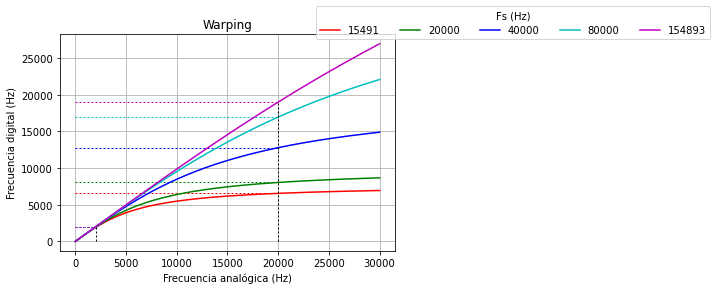

In [129]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

fss= [15491,20000,40000,80000,154893]
colors=['r','g','b','c','m']
fa=np.arange(0,30000)

for fs,colorr in zip(fss,colors):
        f=fs*np.arctan((fa*np.pi)/fs)/np.pi
        plt.plot(fa,f,color=colorr,label=str(fs))
        #plt.axhline(y=f [2000],color=colorr,linestyle="--")
        #plt.axhline(y=f [20000],color=colorr,linestyle="--")
        val=fs*math.atan(2000*math.pi/fs)/math.pi
        val2=fs*math.atan(20000*math.pi/fs)/math.pi
        plt.plot([0, 20000], [val2, val2], colorr, lw=1,dashes=[2, 2])
        plt.plot([0, 2000], [val,val], colorr, lw=1,dashes=[2, 2])
        
fs=154893
val=fs*math.atan(2000*math.pi/fs)/math.pi
val2=fs*math.atan(20000*math.pi/fs)/math.pi
plt.plot([2000, 2000], [0, val], 'black', lw=1,dashes=[2, 2])
plt.plot([20000, 20000], [0, val2], 'black', lw=1,dashes=[2, 2])

ax = plt.axes()
ax.yaxis.grid(True, which='major')
ax.xaxis.grid(True, which='major')
ax.set_title('Warping')
ax.set_xlabel('Frecuencia analógica (Hz)')
ax.set_ylabel('Frecuencia digital (Hz)')
plt.legend(loc="upper left", bbox_to_anchor=(0.75, 1.15), ncol=5, title="Fs (Hz)")
plt.show()

### Punto 3.4
Una forma podria ser modificar el valor del polo analógico para que al deformarse vaya a parar a 20KHz, ese valor seria:

In [130]:
round(fanalogica(20000,80000),2)

16953.79

Es decir que el polo debe estar ubicado en 16.953KHz para que al aplicar la transformada bilineal el polo quede efectivamente en 20KHz

$$ F(s)=8.4765 \cdot \frac{s+(2\cdot\pi\cdot2KHz)}{s+(2\cdot\pi\cdot16.953KHz)}$$

La otra opción es modificar la constante de la transformación bilineal:

$$s=K\frac{1-Z^{-1}}{1+Z^{-1}}$$

Dado que generalmente es tomado como $K=2\cdot f_s$

si recordamos que:

$$f_a=\frac{f_s}{\pi} tan (\frac{f_d \pi}{f_s})$$

y si hacemos que $f_a=f_d=f_{warping}$ y despejamos $f_s$

siendo $f_{warping}=f_w$ la frecuencia que queremos matchear

$$f_w=\frac{f_s}{\pi} tan (\frac{f_w \pi}{f_s})$$

$fs=\frac{f_w\cdot\pi}{tan(\frac{f_w \pi}{fs})}$

Como $K=2\cdot f_s$

$K=\frac{2\cdot f_w\cdot\pi}{tan(\frac{f_w \pi}{fs})}$


En nuestro caso:

$K=\frac{2\cdot 20KHz\cdot\pi}{tan(\frac{20KHz \pi}{80KHz})}$

$K=125663.71$

Vamos la diferencia de tomar K=2fs y el nuevo K

Si K=2fs:

y fs=80000KHz

Recordamos:

$$ F(Z)=10 \cdot \frac{(1+2fs)Z+(1-2fs)}{(10+2fs)Z+10-2fs}$$

Desnormalizada:

$$ F(Z)=10 \cdot \frac{(2\cdot \pi \cdot 2KHz+2fs)Z+(2\cdot \pi \cdot 2KHz-2fs)}{(2\cdot \pi \cdot 20KHz+2fs)Z+2\cdot \pi \cdot 20KHz-2fs}$$

$$ F(Z)=10 \cdot \frac{172566.37\cdot Z-147433.63}{285663.7\cdot Z-34336.3}$$

Ahora vamos a realizar el Pre Warping.

$K=125663.71$

$$ F(Z)=10 \cdot \frac{(2\cdot \pi \cdot 2KHz+125663.71)Z+(2\cdot \pi \cdot 2KHz-125663.71)}{(2\cdot \pi \cdot 20KHz+125663.71)Z+2\cdot \pi \cdot 20KHz-125663.71}$$

$$ F(Z)=10 \cdot \frac{150796.45\cdot Z-113097.34}{251327.42\cdot Z-0.00385}$$


Cambiando el valor del polo del filtro analógico y manteniendo K=2fs:

$$ F(Z)=8.4765 \cdot \frac{(2\cdot \pi \cdot 2KHz+2fs)Z+(2\cdot \pi \cdot 2KHz-2fs)}{(2\cdot \pi \cdot 16.953KHz+2fs)Z+2\cdot \pi \cdot 16.953KHz-2fs}$$

$$ F(Z)=8.4765 \cdot \frac{172566.37\cdot Z-147433.62}{266518.84\cdot Z-53481.16}$$


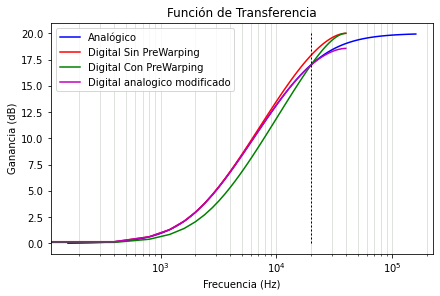

In [131]:
from scipy import signal
import matplotlib.pyplot as plt

fig, ax = plt.subplots(constrained_layout=True)

sys_digital1 = signal.TransferFunction([1725663.7,-1474336.3], [285663.7, -34336.3], dt=1/80000)
sys_digital2 = signal.TransferFunction([1382300.8,-1130973.4], [251327.42, -0.00385], dt=1/80000)
sys_digital3 = signal.TransferFunction([1462758.84,-1249721.16], [266518.84, -53481.16], dt=1/80000)
sys_analogico = signal.TransferFunction([10,10*2*math.pi*2000], [1, 2*math.pi*20000])


wa, maga,phasea = sys_analogico.bode()
ax.semilogx(wa/(2*math.pi), maga,color='b',label='Analógico')

wd1, magd1,phased1 = signal.dbode(sys_digital1)
ax.semilogx(wd1/(2*math.pi), magd1,color='r',label='Digital Sin PreWarping')

wd2, magd2,phased2 = signal.dbode(sys_digital2)
ax.semilogx(wd2/(2*math.pi), magd2,color='g',label='Digital Con PreWarping')

wd3, magd3,phased3 = signal.dbode(sys_digital3)
ax.semilogx(wd3/(2*math.pi), magd3,color='m',label='Digital analogico modificado')


plt.plot([20000, 20000], [0, 20], 'black', lw=1,dashes=[2, 2])


ax.set_title('Función de Transferencia')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Ganancia (dB)')
ax.grid(True, which='both', axis='x', color='xkcd:light grey')
plt.legend()


### ¿Qué error en dB tiene con respecto a la analógica a la frecuencia del cero?

El cero de 2KHz digital queda en:

$$f_a=\frac{80KHz}{\pi} tan (\frac{2KHz \pi}{80KHz})$$

$f_a=2004.122 Hz$

$f_a$ Normalizada es: 1.002061$

$$F(s)=10\frac{s+1}{s+10}$$

si $s=j\omega$

A la frecuencia de $\omega=1rad/seg =2KHz$:

$$F(j1)=10 \frac{1+j}{j+10}$$

$$|F(j1)|=10 \frac{\sqrt{2}}{\sqrt{101}}=1.407$$

$$F(j1.002061)=10 \frac{1+j1.002061}{j1.002061+10}$$

$$|F(j1.002061)|=10 \frac{\sqrt{2.00412624772}}{\sqrt{101.004126248}}=1.40716634561$$

El error en es $ error=1-\frac{1.407}{1.40716634561}\cdot 100=0.01182$%

$ Error[dB]=20 \cdot log(1.40716634561)-20 \cdot log(1.407)=0.00102dB$


### Punto 4

Las expresiones que tuvimos son de la forma

$$\frac{Y(z)}{X(z)}H(z)=K\frac{a_0+a_1Z^{-1}}{b_0+b_1Z^{-1}}$$

$$Y(z)(b_0+b_1Z^{-1})=K\cdot X(z)(a_0+a_1Z^{-1})$$

$$b_0Y(z)+b_1Y(z)Z^{-1}=K\cdot a_0X(z)+a_1X(z)Z^{-1}$$

Antitransformando tenemos:

$$b_0y[n]+b_1y[n-1]=K\cdot a_0x[n]+a_1x[n-1]$$

$$y[n]=\frac{a_0\cdot K}{b_0}x[n]+\frac{a_1\cdot K}{b_0}x[n-1]-\frac{b_1}{b_0}y[n-1]$$

Que en un diagrama de bloque queda:

<img src="./bloques.png" align="center" width="400"/> 


### Punto 5

##### 5.1

Como tenemos 60dB de información de rango dinámico hasta los 20KHz y tomando como que el valor de fondo de escala es de 1V

1/1000 deberia ser el error de cuantificación, por lo tanto tenemos que el ruido es de 1mv. Para poder trabajar y resolver 1mv. 

$1000=2^{N}$ N=9.96 adoptamos 10 bits de conversor analógico digital.


##### 5.2

Para desarrollar el filtro anti-alias debemos saber que el límite de la banda de paso debe estar ubicado en 20KHz dado que nuestra información llega hasta dicha frecuencia. 

El ripple en la banda de paso, podriamos adoptar 1 dB o 3dB si queremos desarrollar un filtro de Butter, para tener maxima planicidad en la banda de paso. 

La banda de detención la podemos ubicar en 40KHz y dado el esquema planteado tener una atenuación de 80 dB

Luego con estos valores, se arma la plantilla, y se busca el orden del filtro para poder obtener la transferencia. 

